In [27]:
import CalcLoadPlotData as clp
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm

In [2]:
yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18

#for temperature calculation:
kB_SI = 1.38e-23 #J/K
kB_cgs = kB_SI * 1e7
X_H = 0.76 # hydrogen mass fraction
gamma = 5/3
m_p = 1.67e-24 # proton mass in g


UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e18 	# pc
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitMass_in_g = 1.989e31		# 0.01 solar masses
UnitMass_in_Msun = UnitMass_in_g / 1.989e33

UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr

In [3]:
folderPath = "/vera/ptmp/gc/xboecker/run/5_SN_cluster_final/"
folderNames = ["0_base_with_IO_fields", "1_density_0_5", "1_density_10",  "2_stars_5", "2_stars_100", "3_rad_5pc", "3_rad_40pc", "4_tempRad_5kyr", "4_tempRad_50kyr"]
#folderPath = "/u/xboecker/run/3_multiple_SNe/"
#folderNames = ["0_1_star", "1_stars_10_linear_spacial_distribution_rad_10", "2_stars_10_linear_temporal_distribution_temp_5kyr", "3_stars_10_linear_spacial_and_temporal_distribution_rad_10pc_temp_5kyr"]
dataFolders = np.full(len(folderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(folderNames)):
    dataFolders[i] = folderPath+folderNames[i]+"/output"
    

boxSize = 96
frameAmount = 40
frameNbrMultiplier = 10
TimeBetSnapshot_in_unit_time = 0.002

In [4]:
clp.GetUnitSystem()
clp.SetUnitSystem(UnitVelocity_in_cm_per_s,UnitLength_in_cm,UnitMass_in_g)
clp.GetUnitSystem()

UnitVelocity_in_cm_per_s = 100.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31
UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31


### SNR Radius

load data
load data
load data
load data
load data
load data
load data
load data
load data


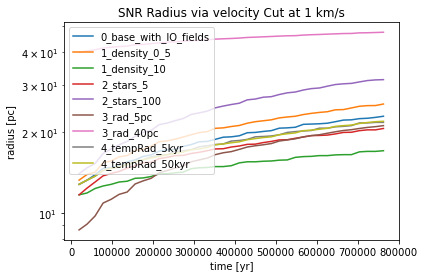

<Figure size 432x288 with 0 Axes>

In [4]:
radiiArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    radiiArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                        folderName = folderNames[i], 
                                        dataName = "velocityCutRadii", 
                                        calcDataOfOneSnapShotFunction = clp.velocityCutRadius,
                                        frameAmount = frameAmount, 
                                        recalculate = False)




clp.PlotData(data = radiiArray, 
         folderNames = folderNames, 
         title = "SNR Radius via velocity Cut at 1 km/s", 
         ylabel = "radius [pc]", 
         dataName = "velocityCutRadii", 
         unit_conversion_factor = 1,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)


### Total Momentum

load data
load data
load data
load data
load data
load data
load data
load data
load data


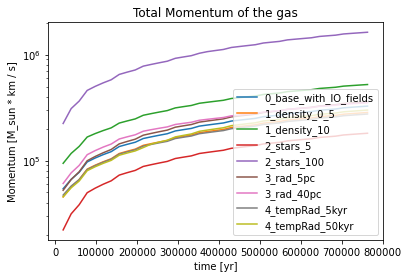

<Figure size 432x288 with 0 Axes>

In [10]:
dataNameForSaveFiles = "totalMomentum"
plotTitle = "Total Momentum of the gas"
plot_yLabel = "Momentum [M_sun * km / s]"
unitConversionFactor = UnitMass_in_Msun * UnitVelocity_in_km_per_s
functionToComputeData = clp.getTotalMomentum

dataArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                        folderName = folderNames[i], 
                                        dataName = dataNameForSaveFiles, 
                                        calcDataOfOneSnapShotFunction = functionToComputeData, 
                                        frameAmount = frameAmount, 
                                        recalculate = False)




clp.PlotData(data = dataArray, 
         folderNames = folderNames, 
         title = plotTitle, 
         ylabel = plot_yLabel, 
         dataName = dataNameForSaveFiles, 
         unit_conversion_factor = unitConversionFactor,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

### max radial Velocity

load data
load data
load data
load data
load data
load data
load data
load data
load data


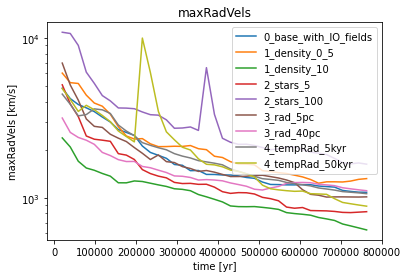

<Figure size 432x288 with 0 Axes>

In [12]:
maxRadVelArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    maxRadVelArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                            folderName = folderNames[i], 
                                             dataName = "maxRadVels", 
                                             calcDataOfOneSnapShotFunction = clp.getMaxRadialGasVelocity, 
                                        frameAmount = frameAmount, 
                                             recalculate = False)

clp.PlotData(data = maxRadVelArray, 
         folderNames = folderNames, 
         title = "maxRadVels", 
         ylabel = "maxRadVels [km/s]", 
         dataName = "maxRadVels", 
         unit_conversion_factor = UnitVelocity_in_km_per_s,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticVelocities = False)

### Terminal Momentum Plots

Literatur:
https://academic.oup.com/mnras/article/492/1/1243/5670636
terminal momentum of 1SN: 3.000 M_sun km/s
11SNe: 35.000 M_sun km/s (0.6pc resolution)
11SNe: 25.000 M_sun km/s ( 20pc resolution)

 Hopkins et al. (2018b) prescribe ∼5 × 10^5 M⊙*N_SNe*km/s of momentum per SN (at ρ = 1.33mH cm−3)
 
 
Martizzi: https://academic.oup.com/mnras/article/450/1/504/998665 (Fig. 4)
1SN, n=100 cm-3 --> radial momentum of the shock 1e43 g*cm/s ~ 1e6 M_sun*km/s

In [5]:
folderPath = "/vera/ptmp/gc/xboecker/run/5_SN_cluster_final/"
folderNames = ["0_base_with_IO_fields", "1_density_0_5", "1_density_10", "1_density_100",  
               "2_stars_1",  "2_stars_5", "2_stars_100", 
               "3_rad_0pc", "3_rad_5pc", "3_rad_20pc", "3_rad_40pc", 
               "4_tempRad_0kyr", "4_tempRad_5kyr", "4_tempRad_25kyr", "4_tempRad_50kyr", 
               "12_density_10_stars_100", "14_density_0_5_tempRad_25kyr", "23_stars_5_rad_5pc", "34_rad_40pc_tempRad_5kyr"]
dataFolders = np.full(len(folderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(folderNames)):
    dataFolders[i] = folderPath+folderNames[i]+"/output"
    

lastFrame = 400

terminalMomenta =  np.zeros(len(folderNames))

for i in range(len(folderNames)):
    terminalMomenta[i] = clp.getTotalMomentum(dataFolders[i], lastFrame)
terminalMomenta

array([1.31235456e+08, 1.05959816e+08, 1.76004544e+08, 1.36033824e+08,
       2.83953000e+07, 7.32344080e+07, 4.18324736e+08, 1.79667728e+08,
       1.44222688e+08, 1.20017336e+08, 1.16620160e+08, 1.29684464e+08,
       1.15659488e+08, 1.14317864e+08, 1.22415776e+08, 9.88592704e+08,
       9.73031600e+07, 7.54497840e+07, 1.04642736e+08])

In [16]:
minTerminalMomentum = np.min(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s
maxTerminalMomentum = np.max(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s

In [7]:
densities = np.zeros(len(folderNames))
nStar = np.array([10,10,10,10,1,5,100,10,10,10,10,10,10,10,10,100,10,5,10])
rad = np.array([10,10,10,10,10,10,10,0,5,20,40,10,10,10,10,10,10,5,40])
tempRad = np.array([10,10,10,10,10,10,10,10,10,10,10,0,5,25,50,10,25,10,5])
for i in range(len(folderNames)):
    densities[i] = clp.getDensities(dataFolders[i], 0)[0]
densities /= densities[0]

#### Density vs n_star

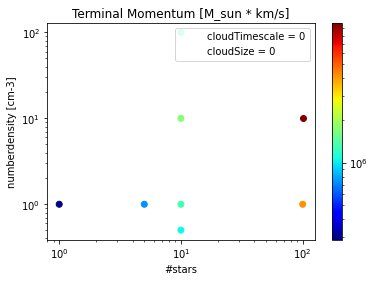

In [25]:
empty_patch = mpatches.Patch(color='none', label="cloudTimescale = 0") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 0") 
plt.legend(handles=[empty_patch, empty_patch2])

s1 = plt.scatter(nStar[:7], densities[:7], c=terminalMomenta[:7] * UnitMass_in_Msun * UnitVelocity_in_km_per_s, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s2 = plt.scatter(nStar[15], densities[15], c=terminalMomenta[15] * UnitMass_in_Msun * UnitVelocity_in_km_per_s, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)

s1.set_norm(LogNorm())
s2.set_norm(LogNorm())
s1.set_clim(minTerminalMomentum,maxTerminalMomentum)
s2.set_clim(minTerminalMomentum,maxTerminalMomentum)

plt.title("Terminal Momentum [M_sun * km/s]")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("#stars")
plt.ylabel("numberdensity [cm-3]")
cbar = plt.colorbar()

#### CloudSize vs TimeScale

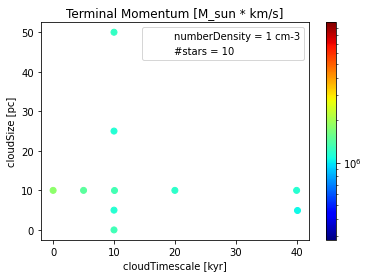

In [26]:
empty_patch = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch2 = mpatches.Patch(color='none', label="#stars = 10") 
plt.legend(handles=[empty_patch, empty_patch2])

s1 = plt.scatter(rad[0], tempRad[0], c=terminalMomenta[0] * UnitMass_in_Msun * UnitVelocity_in_km_per_s, cmap="jet")
s2 = plt.scatter(rad[7:15], tempRad[7:15], c=terminalMomenta[7:15] * UnitMass_in_Msun * UnitVelocity_in_km_per_s, cmap="jet", vmin = np.min(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s, vmax = np.max(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s)
s3 = plt.scatter(rad[18], tempRad[18], c=terminalMomenta[18] * UnitMass_in_Msun * UnitVelocity_in_km_per_s, cmap="jet")

s1.set_norm(LogNorm())
s2.set_norm(LogNorm())
s3.set_norm(LogNorm())
s1.set_clim(minTerminalMomentum,maxTerminalMomentum)
s2.set_clim(minTerminalMomentum,maxTerminalMomentum)
s3.set_clim(minTerminalMomentum,maxTerminalMomentum)

plt.title("Terminal Momentum [M_sun * km/s]")
plt.xlabel("cloudTimescale [kyr]")
plt.ylabel("cloudSize [pc]")
plt.colorbar()

In [29]:
import CalcLoadPlotData as clp
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e21 	# kpc---------------------------
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitLength_in_kpc = UnitLength_in_pc / 1000
UnitMass_in_g = 1.989e43		# 1e10 solar masses-------------
UnitMass_in_Msun = UnitMass_in_g / 1.989e33

UnitDensity_in_cgs = UnitMass_in_g / UnitLength_in_cm**3

g_to_Msun = 1 / 1.989e33
yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18
UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr

m_p = 1.67e-24 # proton mass in g


clp.GetUnitSystem()
clp.SetUnitSystem(UnitVelocity_in_cm_per_s,UnitLength_in_cm,UnitMass_in_g)
clp.GetUnitSystem()

UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31
UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+21 
UnitMass_in_g = 1.989e+43


In [31]:
galaxyFolderPath = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/"
galaxyFolderNames = ["output_100xRes_cooling_SFR_xenoSN", "output"]
galaxyDataFolders = np.full(len(galaxyFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(galaxyFolderNames)):
    galaxyDataFolders[i] = galaxyFolderPath+galaxyFolderNames[i]
    

galaxyBoxSize = 200
galaxyFrameAmount = 301
galaxyFrameNbrMultiplier = 1
TimeBetSnapshot_in_unit_time = 0.01 # ----------

In [34]:
def plotZMeanValueProfile(folder, timeStep, loadValuesFunction, n_bins, yMin, yMax, yLabel, savePath):
    # Define position and velocity data
    coos = clp.getCoos(folder, timeStep)[:,2]
    values = loadValuesFunction(folder, timeStep) * UnitVelocity_in_km_per_s
    
    # Create the histogram
    n, bins, patches = plt.hist(coos, bins=n_bins, weights=values, histtype='bar', color='g')

    plt.clf()
    
    plt.figure(figsize=(10, 6), dpi=300)
    #plt.yscale("log")
    
    # Calculate the mean velocity for each bin
    bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
    

    # Plot the mean velocity on the y-axis
    plt.bar(bins[:-1], bin_means, width=np.diff(bins), align='edge', edgecolor='black', alpha=0.5)

    # Add labels to the axes
    plt.title("Time Step: {}".format(timeStep))
    plt.xlabel('z-Position (kpc)')
    plt.ylabel(yLabel)
    
    plt.xlim(0,galaxyBoxSize)
    plt.ylim(yMin, yMax)
    

    # Show the plot
    #plt.show()
    
    plt.savefig(savePath + 'frame_%03d.png' % timeStep)

  0%|                                                   | 0/301 [00:00<?, ?it/s]/tmp/ipykernel_19718/4096513407.py:15: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
  6%|██▋                                       | 19/301 [00:12<02:55,  1.61it/s]/tmp/ipykernel_19718/4096513407.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6), dpi=300)
100%|█████████████████████████████████████████| 301/301 [03:07<00:00,  1.60it/s]


<Figure size 432x288 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

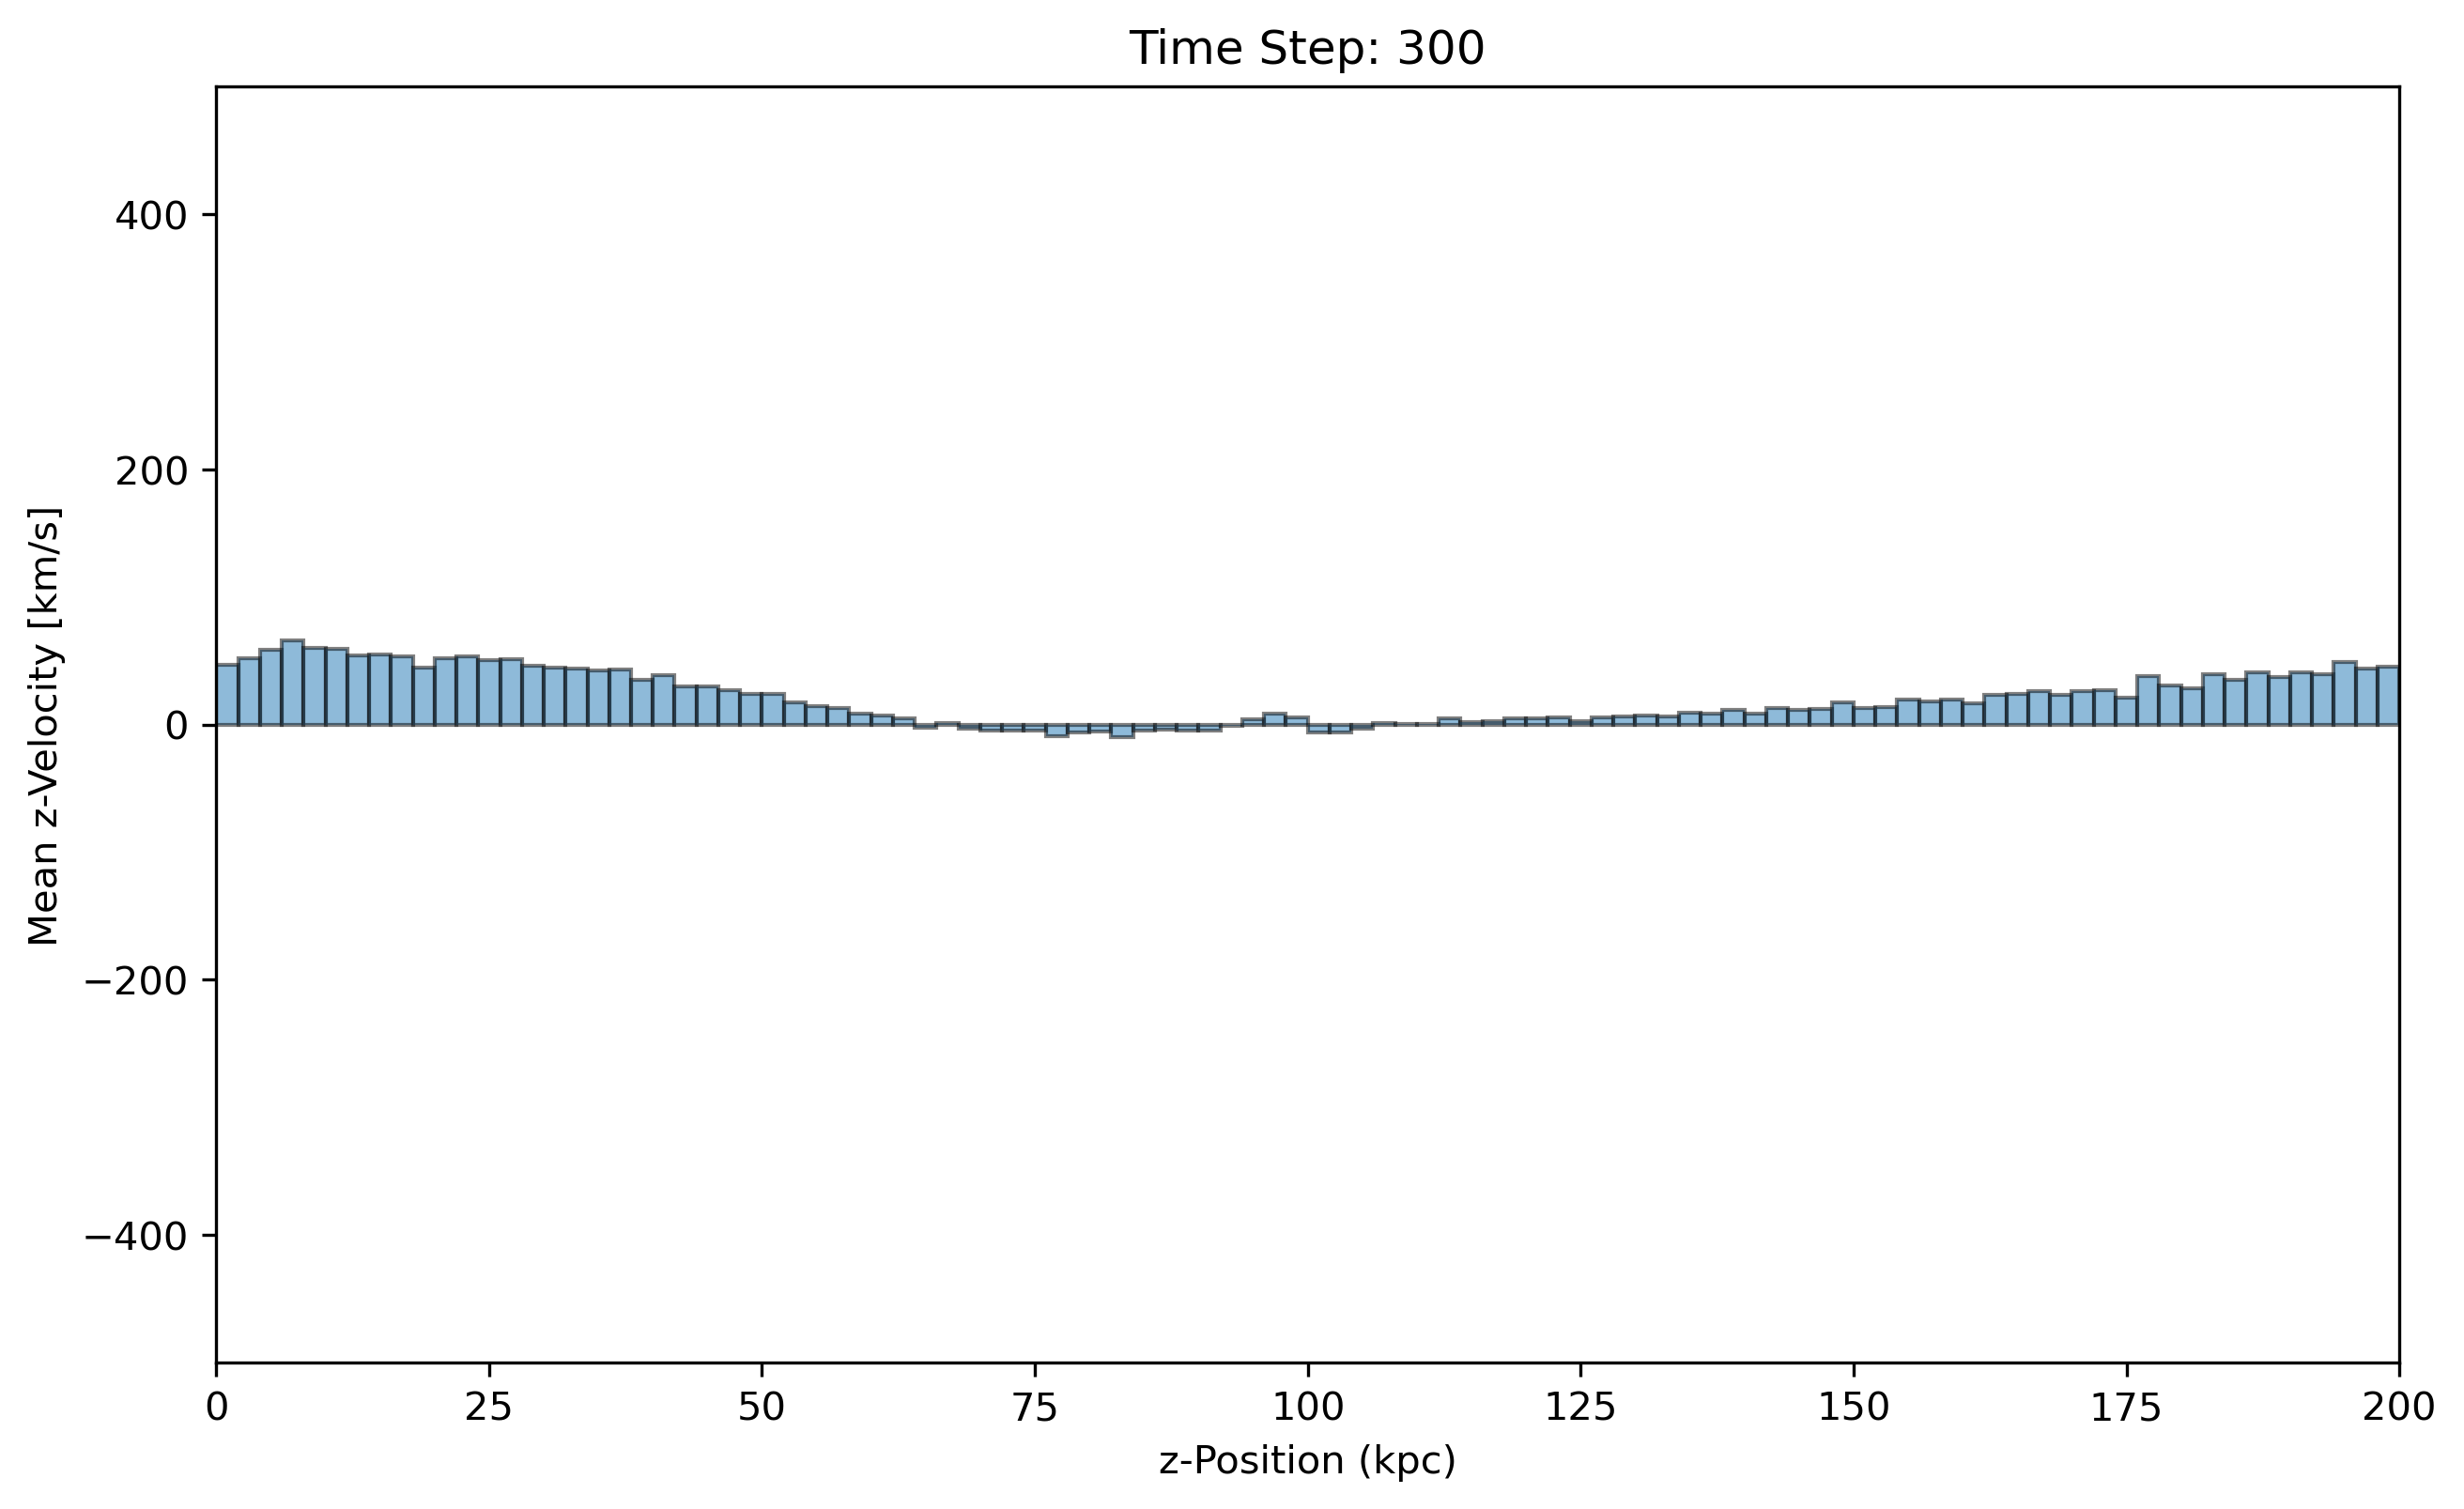

In [36]:
from tqdm import tqdm

folder = galaxyDataFolders[0]
n_bins = 100
yMin = -500
yMax = 500
yLabel = "Mean z-Velocity [km/s]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zMeanVelProfiles100x/"
# todo: scalefactor, logscale?, getValuesFct

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, clp.getZVelocities, n_bins, yMin, yMax, yLabel, savePath)